# Project on Machine Learning
## Overview
The aim of this project is to use data from Monte Carlo simulations of a familiar system from Statistical Mechanics, namely the Ising Model. We will use a simple model without any external magnetic field. The energy expectation value is expressed as
    $$E=-J\sum\limits^N_{\{kl\}}s_ks_l$$
The $s_k$ and $s_l$ indicate a spin. The spins are represented in a spin-lattice with $s_k=\pm 1$ and $N$ being the total number of spins. $J$ is a coupling constant representing the strength of the interaction between neighbouring pairs of spins. The $<kl>$ notation indicate sum over the nearest neighbours.

The data used is and the methods explored follow closesly article >> ref <<. The methods explored here is logistic regression, random forest algortihm and deep neural networks.

The interresting physical properties to be extracted is states above, below and around a critical temperature $T_c$. When the system is in a temperature lower than this the system is in a so-called ferromagnetic phase. When close to the critical point, the magnetization becomes smaller, while the net magnetization is zero when the temperature is above $T_c$.

## Theory
We will first present the theory for the methods mentioned.

### Linear Regression
Linear regression model is a model for fitting data-points to a linear functional form.

Given a data set 
    $$\{y_i, \boldsymbol{x}_i\}_{i=1}^n,\; i=1,\dots,n$$ 
of $n$ points with $\boldsymbol{X}$ being the $n\times m$ matrix representing the regressors. Assuming the relationship between the regressors and $y_i$ is linear, the model is
    $$\boldsymbol{y} = \boldsymbol{X}\boldsymbol{\beta} + \boldsymbol{\varepsilon}$$
with 
    $$
    \boldsymbol{y} =
        \begin{pmatrix}
            y_1 \\
            \vdots \\
            y_n
        \end{pmatrix},
    $$
    $$
    \boldsymbol{X} =
        \begin{pmatrix}
            1 & f_1\left(x_{11}\right) & \dots & f_1\left(x_{1m}\right) \\
            \vdots & \vdots & \ddots & \vdots \\
            1 & f_n\left(x_{n1}\right) & \dots & f_n\left(x_{nm}\right)
        \end{pmatrix}
    $$
and
    $$
    \boldsymbol{\beta} = 
        \begin{pmatrix}
            \beta_0 \\
            \vdots \\
            \beta_m
        \end{pmatrix}.
    $$
The vector $\boldsymbol{\varepsilon}$ is an estimate for the noise in the system(i.e variance in the Monte Carlo simulation) and $f_i$ is a pre-defined function. This can for instance be a polynomial function
    $$f_i(x) = x^i,$$
or a polynomial in sine
    $$f_i(x) = \sin(ix),$$
or any other suitable choice.

The method of linear regression is simply to minimize the $L_2$-norm with respect to parameters $\boldsymbol{\beta}$, giving the following scheme
    $$\underset{\boldsymbol{\beta}}{\text{min}}{\big|}\boldsymbol{X}\boldsymbol{\beta} - \boldsymbol{y}{\big|}^2,$$
with solution
    $$\boldsymbol{\beta}_{\text{LS}} = \underset{\boldsymbol{\beta}}{\text{arg}\text{min}}{\big|}\boldsymbol{X}\boldsymbol{\beta} - \boldsymbol{y}{\big|}^2.$$
Some differentiation yields in the following solution
    $$\boldsymbol{\beta}_{\text{LS}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.$$
This optimization is known as the least-squares scheme.

#### Ridge and Lasso Regression
While the linear regression model is rigorous and simple, it does have a tendency to overfit. In order to somewhat avoid this problem so-called regularization technicues have been developed. Two of these are Ridge and Lasso Regression.

##### Ridge Regression
With Ridge regression one performs an L2 regularization by adding an additional term equal to the square of the magnitude of the coefficients. This effectively ends up with performing the original linear regression, but with an added term. The equation is as follows
    $$\boldsymbol{y} = \boldsymbol{X}\boldsymbol{\beta} + \alpha\sum_{i=1}^m\beta^2_i,$$
with the scheme
    $$\boldsymbol{\beta}_{\text{Ridge}} = \underset{\boldsymbol{\beta}}{\text{arg}\text{min}}\left({\big|}\boldsymbol{X}\boldsymbol{\beta} - \boldsymbol{y}{\big|}^2 + \alpha{\big|}\boldsymbol{\beta}{\big|}^2\right)$$
The factor $\alpha$ is just a scaling. This scheme is the same optimization problem as with the least-squares approach, but with a constraint $|\boldsymbol{\beta}|^2\leq t$ for some $t\geq 0$. We solve this again by differentiation with respect to $\boldsymbol{\beta}$ giving
    $$\boldsymbol{\beta}_{\text{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X} + \alpha \boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}$$

##### Lasso Regression
The Lasso regression scheme performs an L1 regularization by adding only the absolute value of the magnitude of coefficients. The equation is
    $$\boldsymbol{y} = \boldsymbol{X}\boldsymbol{\beta} + \alpha\sum_{i=1}^m{\big|}\beta_i{\big|},$$
with $\alpha$ defined as before. The scheme is simply 
    $$\boldsymbol{\beta}_{\text{Lasso}} = \underset{\boldsymbol{\beta}}{\text{arg}\text{min}}\left({\big|}\boldsymbol{X}\boldsymbol{\beta} - \boldsymbol{y}{\big|}^2 + \alpha{\big|}\boldsymbol{\beta}{\big|}\right).$$
As with the Ridge scheme this is also an optimization similar to least-squares with a constraint. The constraint in this case is $|\boldsymbol{\beta}|\leq t$ for some $t\geq 0$.

We cannot simply take the derivative in the Lasso scheme since the added regulizer is not everywhere differentiable, however since it is a convex problem the "subgradient optimally condition" can be invoked. Assuming $\boldsymbol{X}$ is orthogonal the solution is
    $$\beta^{\text{Lasso}}_j = \text{sign}\left(\beta^{\text{LS}}_j\right)\left({\big|}\beta^{\text{LS}}_j{\big|} - \alpha\right)_+$$

#### Transform the Ising Model to a Linear Regression Problem
In order to use linear regression with the Ising model we assume the model (without any prior knowledge) the all-to-all Ising model
    $$E^{(i)} = -\sum\limits_{kl}^NJ_{kl}s^{(i)}_ks^{(i)}_l,$$
with the $J_{kl}$ being the coupling strengths we wish to learn. The index $i$ represents a sample point. This equation can be rewritten as the matrix equation
    $$E^{(i)} = -\boldsymbol{X}^{(i)} \cdot \boldsymbol{J},$$
with $\boldsymbol{X}^{(i)}$ representing the two-body interactions 
    $$\left\{s^{(i)}_k,s^{(i)}_l\right\}_{k,l=1}^N.$$
This is the exact linear regression presented earlier.

### Logistic Regression
As the title suggests, Logistic regression fits the data to a logistic function. A sigmoid function of the following form 
    $$f(x) = \frac{1}{1 + \exp(-\boldsymbol{x}^T\boldsymbol{w})}$$.


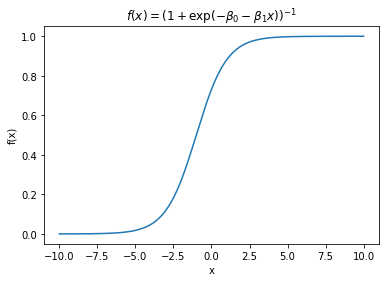

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def logisticFunction(x, b0=1, b1=1):
    """ calculate and return logistic function """
    return 1 / (1 + np.exp(-b0-b1*x))

x = np.linspace(-10,10,1000)

plt.plot(x, logisticFunction(x))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("$f(x)=(1 + \\exp(-\\beta_0-\\beta_1x))^{-1}$")
plt.show()

The idea with the binary logistic regression is to find the probability for a stochastic variable $X$ to be part of some category $Y$, this is just a joint probability $P(Y|X)$. In terms of regression terminology $Y$ would be the response and $X$ the explanatory variable. $X$ can be a data-point and the categories can be expressed as $Y=\{0,1\}$. Since we work with data-points it is convenient to index them as
    $$X\rightarrow X_i$$
    $$Y\rightarrow Y_i=\{0,1\}$$
The probabilites can then be expressed as
    $$f(Y_i=1|\boldsymbol{X}_i,\boldsymbol{w}) = \frac{1}{1 + \exp(-\boldsymbol{X}_i^T\boldsymbol{w})}$$
    $$f(Y_i=0|\boldsymbol{X}_i,\boldsymbol{w}) = 1 - f(Y_i=1|\boldsymbol{X}_i)$$
The problem addressed is simply a dataset with points $\boldsymbol{X}_i$ and binary labels $Y_i\in\{0,1\}$. Considering drawing datapoints independently the likelihood of seing some data $D_i=\{(Y_i,\boldsymbol{X}_i)\}$ is
    $$P(D_i|\boldsymbol{w}) = \prod_{i=1}^n\left[f\left(\boldsymbol{X}_i^T\boldsymbol{w}\right)\right]^{Y_i} \left[1 - f\left(\boldsymbol{X}_i^T\boldsymbol{w}\right)\right]^{1-Y_i},$$
and the maximum likelihood estimator(MLE) is defined as the set of parameters which maximizes the log-likelihood(log of above function). The expression for $\boldsymbol{w}$ is
    $$\boldsymbol{w}_{\text{MLE}}= \underset{\boldsymbol{w}}{\text{arg}\text{max}} \sum\limits_{i=1}^n \left[y_i\log\left(f\left(\boldsymbol{X}_i^T\boldsymbol{w}\right)\right) + (1 - Y_i)\log\left(1 - f\left(\boldsymbol{X}_i^T\boldsymbol{w}\right)\right)\right].$$
The cost is just the negative log-likelihood and is known as the cross-entropy in statistics. The expression is
    $$C(\boldsymbol{w}) = -\sum\limits_{i=1}^n \left[Y_i\log\left(f\left(\boldsymbol{X}_i^T\boldsymbol{w}\right)\right) + (1 - Y_i)\log\left(1 - f\left(\boldsymbol{X}_i^T\boldsymbol{w}\right)\right)\right].$$
The cross-entropy is convex by the second-derivative test(with respect to parameters $\boldsymbol{w}$) meaning a simple minimization gives the global minimum. The equation is
    $$\boldsymbol{0} = \nabla C(\boldsymbol{w}) = \sum_{i=1}^n\left[f\left(\boldsymbol{X}_i^T\boldsymbol{w}\right) - Y_i\right]\boldsymbol{X}_i.$$
This is a transcendental equation for $\boldsymbol{w}$ which has to be solved numerically by some numerical optimization scheme such as gradient descent or some Quasi-Newton method.